<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Germany-Data" data-toc-modified-id="Germany-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Germany Data</a></span></li><li><span><a href="#Load-data,-Fit-Model" data-toc-modified-id="Load-data,-Fit-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data, Fit Model</a></span></li><li><span><a href="#Display-Actual-vs-Prediction" data-toc-modified-id="Display-Actual-vs-Prediction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Display Actual vs Prediction</a></span></li></ul></div>

## Germany Data

## Load data, Fit Model

In [6]:
import pandas as pd

# Get our Country model data
country = 'Germany'
meta_df = pd.read_csv('../data/raw/country_meta.csv', index_col='country')
start_str = meta_df.loc[country, 'start_str']
province = meta_df.loc[country, 'province']
duration_guess = meta_df.loc[country, 'duration_guess']
peak_guess = meta_df.loc[country, 'peak_guess']
population = meta_df.loc[country, 'start_str']
filepath = '../data/raw/'
iata_2 = meta_df.loc[country, 'iata_2']

In [7]:
import sys
from os import path
sys.path.append(path.pardir)
from src.covid import CovidCountry

fixes = {'2020-03-12': 2745,
         '2020-03-23': 29056,}

de = CovidCountry(country=country,
                  province=province,
                  filepath=filepath,
                  fixes=fixes)

de.load(today=126000)

In [8]:
de.fit(start_str=start_str,
       duration_guess=duration_guess,
       peak_guess=peak_guess)

de_df = de.predict()
de.save(filepath, iata_2)

## Display Actual vs Prediction

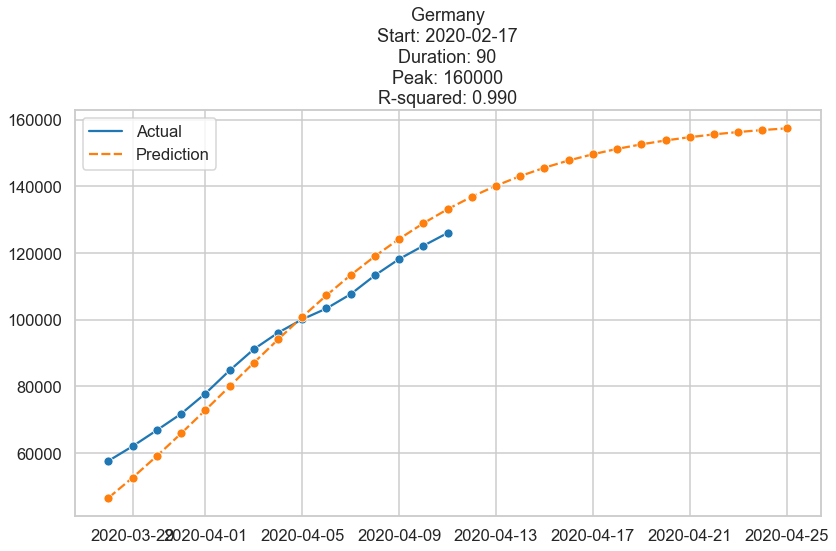

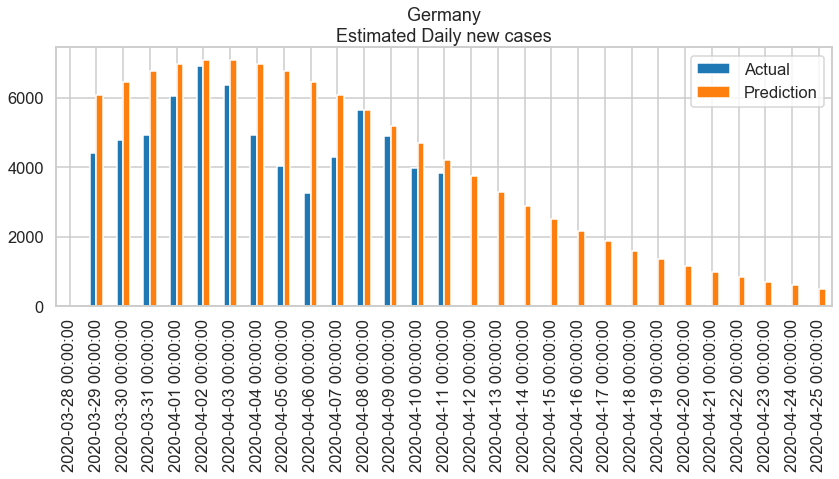

In [9]:
de.display(offset=14)